In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma, norm, binom, uniform, t, expon
#import numdifftools as nd
from sklearn.linear_model import LinearRegression as linreg
import sympy as sym
from scipy.optimize import brentq, minimize
from datetime import datetime as dt

# Monte Carlo Integration

h(x) =


(x + sin(20*x) + cos(1000*x))**2

Integral of h(x) =


x**3/3 + x*sin(20*x)**2/2 + x*sin(1000*x)**2/2 + x*sin(1000*x)/500 + x*cos(20*x)**2/2 - x*cos(20*x)/10 + x*cos(1000*x)**2/2 + 5*sin(20*x)*sin(1000*x)/2499 - sin(20*x)*cos(20*x)/40 + sin(20*x)/200 + sin(1000*x)*cos(1000*x)/2000 + cos(20*x)*cos(1000*x)/24990 + cos(1000*x)/500000

Integrate h(x) from 0 to 1: 1.2911408958116635


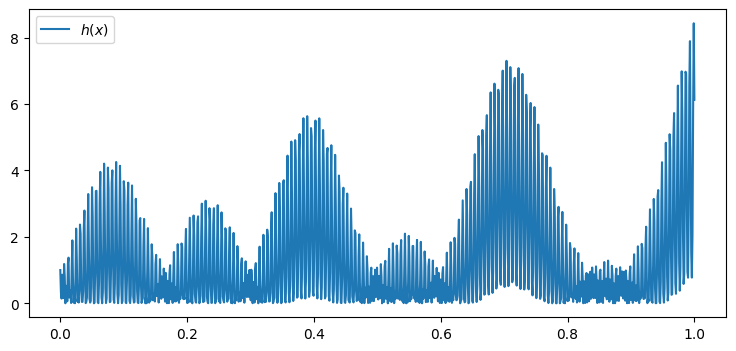

In [5]:
x = sym.Symbol('x')
h = (x+sym.sin(20*x)+sym.cos(1000*x))**2
h_int = sym.integrate(h)
print('h(x) =')
display(h)
print('Integral of h(x) =')
display(h_int)

h = sym.lambdify(x, h)
h_int = sym.lambdify(x, h_int)
mu = h_int(1) - h_int(0)
print('Integrate h(x) from 0 to 1: {}'.format(mu))

xx = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(xx, h(xx), label='$h(x)$')
ax.legend()
plt.show()

For the highly irregular integrand $h(x)$, Monte Carlo (MC) will be your only choice to do numerical integration. 

Based on the LLT (Law of Large Numbers):
$$
\mu=\int_a^bh(x)\mathrm{d}x=(b-a)\mathbb{E}_{U(a,b)}[h(X)]\approx\hat{\mu}=\frac{(b-a)}{n}\sum_{i=1}^nh(x_i), x_i\sim U(a,b)
$$

Based on the CLT (Central Limit Theorem):
$$
\sqrt{n}\frac{(\hat{\mu}-\mu)}{\sigma}\to N(0, 1), \sigma^2=(b-a)^2\mathrm{Var}_{U(a,b)}[h(X)]
$$

which gives the $95\%$ confidence interval (C.I.):
$$
[\hat{\mu}-\frac{1.96\hat{\sigma}}{\sqrt{n}}, \hat{\mu}+\frac{1.96\hat{\sigma}}{\sqrt{n}}], \hat{\sigma}^2=(b-a)^2\hat{\mathrm{Var}}[h(x_i)]
$$
where $\hat{\mathrm{Var}}[h(x_i)]$ means the sample variance. 

Always construct the C.I. when you do estimation as it contains more information. The popularity of the confidence interval also comes from a theorem that, under some conditions, it converges with a speed of $n^{-1}$, while the point estimate normally only converges at the rate of $n^{-0.5}$ (refer to this book https://statweb.stanford.edu/~owen/mc/). 

* Estimate the integration of $h(x)$ from 0 to 1. Draw the point estimates and the corresponding confidence intervals against differents sample sizes $n$ in a single plot, where you should use the true value $\mu$ as a reference line. Draw the errors of the point estimates against $n$ in a loglog plot and check its convergence rate. 

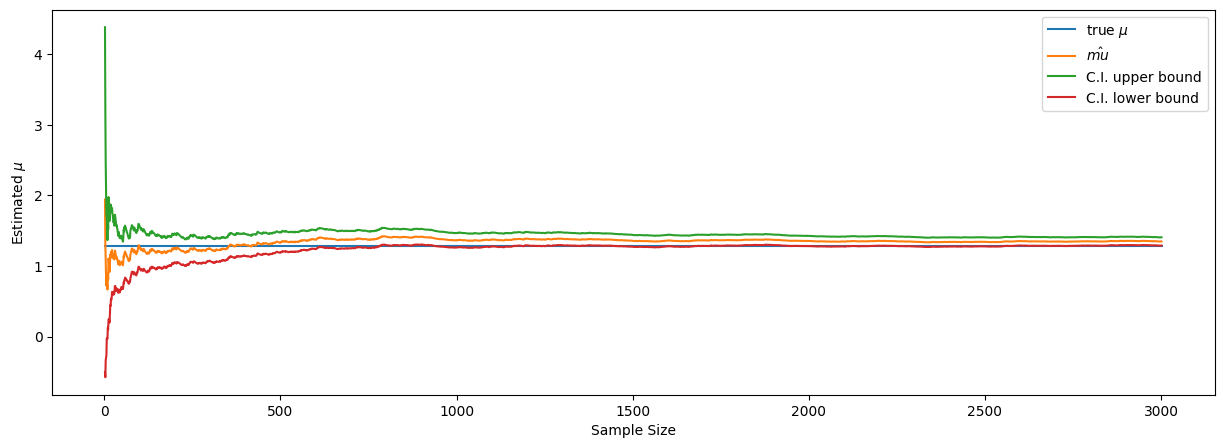

In [6]:
np.random.seed(19971107)
samples = uniform.rvs(size=10000000)
hx = h(samples)

ns = np.arange(2, hx.size+1)
cummean_x = np.cumsum(hx)[1:] / ns
cummean_x2 = np.cumsum(hx**2)[1:] / ns
cumstd = np.sqrt((cummean_x2 - cummean_x**2) / (ns - 1))

upper = cummean_x + 1.96 * cumstd
lower = cummean_x - 1.96 * cumstd

fig, axs = plt.subplots(1, 1, figsize = (15, 5))

axs.plot([ns[0], ns[3000]], [mu, mu], label='true $\mu$')
axs.plot(ns[:3000], cummean_x[:3000], label='$\hat{mu}$')
axs.plot(ns[:3000], upper[:3000], label='C.I. upper bound')
axs.plot(ns[:3000], lower[:3000], label='C.I. lower bound')
axs.legend()
axs.set_xlabel('Sample Size')
axs.set_ylabel('Estimated $\mu$')
 

plt.show()

# The Inversion Method
A random variable $X$ with a reversible cdf $F(x)$ can be sampled by $x_i=F^{-1}(u_i), u_i\sim U(0, 1), i=1,\dots,n$. This is a fundamental important method as all the initial pseudo random numbers generated by the computer always follows $U(0, 1)$. 

* Try to generate standard normal random samples if you only have the cdf of the normal distribution. Compare the samples with the normal pdf. (hints: use the 'norm.cdf' and the 'brentq' function from 'scipy.optimize' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html)))

In [ ]:
np.random.seed(1)
unifs = uniform.rvs(size=3000)
samples = []
for unif in unifs:
    fun = lambda x: norm.cdf(x) - unif
    samples.append(brentq(fun, -100, 100))# brentq gives the roots of fun in iterval [-100,100]
    
xx = np.linspace(-4, 4, 1000)
fig, ax = plt.subplots(figsize = (9, 5))
ax.plot(xx, norm.pdf(xx), label='$N(0, 1)$')
ax.hist(samples, bins=50, density=True, histtype='step', label='samples')
ax.legend()
plt.show()